In [34]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import pandas as pd
import numpy as np
import pickle
import os
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
# Load your Excel file
file_path = 'data/final_check_with_preds.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# Separate numerical and categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")


DATASET OVERVIEW
Shape: 1525 rows × 11 columns

Columns: ['Id', 'folder_name', 'Data Url', 'Shape', 'Carat', 'Clarity', 'Color', 'Cut', 'Polish', 'Symmetry', 'Price']

Data types:
Id              object
folder_name     object
Data Url        object
Shape           object
Carat          float64
Clarity         object
Color           object
Cut             object
Polish          object
Symmetry        object
Price          float64
dtype: object

Missing values:
Id                0
folder_name       0
Data Url          0
Shape             1
Carat             1
Clarity           1
Color             1
Cut               1
Polish            1
Symmetry          1
Price          1525
dtype: int64


Categorical columns: ['Id', 'folder_name', 'Data Url', 'Shape', 'Clarity', 'Color', 'Cut', 'Polish', 'Symmetry']
Numerical columns: ['Carat', 'Price']


In [3]:
df_price = pd.read_csv('data/Diamonds/diamonds_clean_combined.csv')

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Shape: {df_price.shape[0]} rows × {df_price.shape[1]} columns")
print(f"\nColumns: {df_price.columns.tolist()}")
print(f"\nData types:\n{df_price.dtypes}")
print(f"\nMissing values:\n{df_price.isnull().sum()}")

# Separate numerical and categorical columns
categorical_cols = df_price.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_price.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")


DATASET OVERVIEW
Shape: 1525 rows × 13 columns

Columns: ['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url', 'cut_type']

Data types:
Id               object
Shape            object
Weight          float64
Clarity          object
Colour           object
Cut              object
Polish           object
Symmetry         object
Fluorescence     object
Messurements     object
Price            object
Data Url         object
cut_type         object
dtype: object

Missing values:
Id              0
Shape           0
Weight          0
Clarity         0
Colour          0
Cut             0
Polish          0
Symmetry        0
Fluorescence    0
Messurements    0
Price           0
Data Url        0
cut_type        0
dtype: int64


Categorical columns: ['Id', 'Shape', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url', 'cut_type']
Numerical columns: ['Weight']


In [4]:
features = ['Shape', 'Carat', 'Clarity', 'Color', 'Cut', 'Polish', 'Symmetry']

X = df[features]
y = df_price['Price']

In [5]:
X.head()

,Shape,Carat,Clarity,Color,Cut,Polish,Symmetry
0,heart,0.421655,VS2,Faint_Yellow,EX,VG/GD,very good
1,heart,0.457652,VS2,Faint_Yellow,EX,VG/GD,VG
2,heart,0.451207,VS1,Faint_Yellow,VG,EX,VG
3,heart,0.416126,SI2,Light_Yellow,VG,EX,VG
4,heart,0.459134,SI2,Near_Colorless_Low,VG,EX,VG


In [6]:
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Shape: {X.shape[0]} rows × {X.shape[1]} columns")
print(f"\nColumns: {X.columns.tolist()}")
print(f"\nData types:\n{X.dtypes}")

# Separate numerical and categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")


DATASET OVERVIEW
Shape: 1525 rows × 7 columns

Columns: ['Shape', 'Carat', 'Clarity', 'Color', 'Cut', 'Polish', 'Symmetry']

Data types:
Shape        object
Carat       float64
Clarity      object
Color        object
Cut          object
Polish       object
Symmetry     object
dtype: object


Categorical columns: ['Shape', 'Clarity', 'Color', 'Cut', 'Polish', 'Symmetry']
Numerical columns: ['Carat']


In [7]:
for col in categorical_cols:
    unique_values = df[col].unique()
    n_unique = len(unique_values)
    
    print(f"\n📊 {col.upper()}:")
    print(f"   Total unique values: {n_unique}")
    print(f"   Values: {sorted([str(v) for v in unique_values if pd.notna(v)])}")
    
    # Show value counts
    print(f"\n   Distribution:")
    counts = df[col].value_counts()
    for val, count in counts.items():
        print(f"     • {val}: {count} ({count/len(df)*100:.1f}%)")


📊 SHAPE:
   Total unique values: 6
   Values: ['cushion', 'emerald', 'heart', 'oval', 'round']

   Distribution:
     • round: 512 (33.6%)
     • heart: 334 (21.9%)
     • emerald: 269 (17.6%)
     • cushion: 262 (17.2%)
     • oval: 147 (9.6%)

📊 CLARITY:
   Total unique values: 11
   Values: ['FL', 'I1', 'I2', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

   Distribution:
     • SI1: 432 (28.3%)
     • VS2: 339 (22.2%)
     • VS1: 270 (17.7%)
     • SI2: 215 (14.1%)
     • VVS2: 149 (9.8%)
     • VVS1: 68 (4.5%)
     • I1: 34 (2.2%)
     • IF: 11 (0.7%)
     • I2: 4 (0.3%)
     • FL: 2 (0.1%)

📊 COLOR:
   Total unique values: 8
   Values: ['Faint_Yellow', 'Light_Yellow', 'Near_Colorless_High', 'Near_Colorless_Low', 'Premium_White', 'Very_Light_Yellow', 'Yellow_LowEnd']

   Distribution:
     • Premium_White: 364 (23.9%)
     • Near_Colorless_Low: 363 (23.8%)
     • Near_Colorless_High: 313 (20.5%)
     • Faint_Yellow: 298 (19.5%)
     • Very_Light_Yellow: 123 (8.1%)
     • Ligh

In [8]:
# Define mapping dictionaries for each feature
mapping_config = {
    'Shape': {
        'cushion': 'Cushion',
        'emerald': 'Emerald',
        'heart': 'Heart',
        'oval': 'Oval',
        'round': 'Round'
    },
    
    'Clarity': {
        'FL': 'IF',  # Flawless -> Internally Flawless (closest match)
        'IF': 'IF',
        'VVS1': 'VVS1',
        'VVS2': 'VVS2',
        'VS1': 'VS1',
        'VS2': 'VS2',
        'SI1': 'SI1',
        'SI2': 'SI2',
        'I1': 'I1',
        'I2': 'I2',
        'I3': 'I3'
    },
    
    'Color': {
        'Premium_White': 'D',  # Best color
        'Near_Colorless_High': 'F',  # High near colorless
        'Near_Colorless_Low': 'H',  # Low near colorless
        'Faint_Yellow': 'J',  # Faint yellow tint
        'Very_Light_Yellow': 'K',  # Very light yellow
        'Light_Yellow': 'L',  # Light yellow
        'Yellow_LowEnd': 'M'  # Yellow low end
    },
    
    'Cut': {
        'EX': 'Excellent',
        'VG': 'Very Good',
        'GD': 'Good',
        'F': 'Fair'
    },
    
    'Polish': {
        'EX': 'Excellent',
        'VG/GD': 'Very Good'  # Mapping combined category to higher grade
    },
    
    'Symmetry': {
        'EX': 'Excellent',
        'excellent': 'Excellent',
        'VG': 'Very Good',
        'very good': 'Very Good',
        'GD': 'Good',
        'FR': 'Fair',
        'fair': 'Fair'
    }
}

In [9]:
# Function to apply mappings to dataframe
def transform_diamond_data(df, mappings):
    """
    Transform categorical columns in diamond dataframe according to mapping rules.
    
    Parameters:
    df: pandas DataFrame with original data
    mappings: dictionary of column names to value mappings
    
    Returns:
    Transformed DataFrame
    """
    df_transformed = df.copy()
    
    for column, mapping in mappings.items():
        if column in df_transformed.columns:
            df_transformed[column] = df_transformed[column].map(mapping)
            # Check for any unmapped values
            unmapped = df_transformed[column].isna().sum()
            if unmapped > 0:
                print(f"Warning: {unmapped} unmapped values in {column}")
        else:
            print(f"Warning: Column {column} not found in dataframe")
    
    return df_transformed

# Apply the transformation
X = transform_diamond_data(X, mapping_config)

# Verify the transformation
print("Transformation complete!")
print("\nSample of transformed data:")
print(X.head())

# Check distributions
for col in mapping_config.keys():
    if col in X.columns:
        print(f"\n📊 {col}:")
        print(X[col].value_counts())

Transformation complete!

Sample of transformed data:
   Shape     Carat Clarity Color        Cut     Polish   Symmetry
0  Heart  0.421655     VS2     J  Excellent  Very Good  Very Good
1  Heart  0.457652     VS2     J  Excellent  Very Good  Very Good
2  Heart  0.451207     VS1     J  Very Good  Excellent  Very Good
3  Heart  0.416126     SI2     L  Very Good  Excellent  Very Good
4  Heart  0.459134     SI2     H  Very Good  Excellent  Very Good

📊 Shape:
Shape
Round      512
Heart      334
Emerald    269
Cushion    262
Oval       147
Name: count, dtype: int64

📊 Clarity:
Clarity
SI1     432
VS2     339
VS1     270
SI2     215
VVS2    149
VVS1     68
I1       34
IF       13
I2        4
Name: count, dtype: int64

📊 Color:
Color
D    364
H    363
F    313
J    298
K    123
L     60
M      3
Name: count, dtype: int64

📊 Cut:
Cut
Excellent    700
Very Good    645
Good         158
Fair          21
Name: count, dtype: int64

📊 Polish:
Polish
Excellent    997
Very Good    527
Name: count, dty

In [19]:
# Get the current working directory (for Jupyter Notebooks)
script_dir = os.getcwd()

# Get the parent directory (the "father" folder)
parent_dir = os.path.dirname(script_dir)

data_dir = os.path.join(parent_dir, 'data')

models_dir = os.path.join(parent_dir, 'models')

In [11]:
X.head()

,Shape,Carat,Clarity,Color,Cut,Polish,Symmetry
0,Heart,0.421655,VS2,J,Excellent,Very Good,Very Good
1,Heart,0.457652,VS2,J,Excellent,Very Good,Very Good
2,Heart,0.451207,VS1,J,Very Good,Excellent,Very Good
3,Heart,0.416126,SI2,L,Very Good,Excellent,Very Good
4,Heart,0.459134,SI2,H,Very Good,Excellent,Very Good


In [12]:
# Load the saved OneHotEncoder
with open(os.path.join(data_dir, 'encoder.pkl'), 'rb') as f:
    encoder = pickle.load(f)

# Check what features the encoder expects
print("Features the encoder was trained on:")
print(encoder.feature_names_in_)

# Check the categories for each feature
print("\nCategories per feature:")
for i, feature in enumerate(encoder.feature_names_in_):
    print(f"{feature}: {encoder.categories_[i]}")

# Load the StandardScaler
with open(os.path.join(data_dir, 'scaler.pkl'), 'rb') as f:
    scaler = pickle.load(f)

Features the encoder was trained on:
['cut' 'color' 'clarity' 'clarity' 'cut_quality' 'polish' 'symmetry']

Categories per feature:
cut: ['Asscher' 'Cushion' 'Cushion Modified' 'Emerald' 'Heart' 'Marquise'
 'Oval' 'Pear' 'Princess' 'Radiant' 'Round']
color: ['D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'unknown']
clarity: ['I1' 'I2' 'I3' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']
clarity: ['I1' 'I2' 'I3' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']
cut_quality: ['Excellent' 'Fair' 'Good' 'Ideal' 'Very Good' 'unknown']
polish: ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good']
symmetry: ['Excellent' 'Fair' 'Good' 'Poor' 'Very Good']


In [13]:
# Column name mapping dictionary
column_rename_mapping = {
    'Shape': 'cut',           # Shape -> cut
    'Color': 'color',         # Color -> color (just lowercase)
    'Clarity': 'clarity',     # Clarity -> clarity (just lowercase)
    'Cut': 'cut_quality',     # Cut -> cut_quality
    'Polish': 'polish',       # Polish -> polish (just lowercase)
    'Symmetry': 'symmetry',    # Symmetry -> symmetry (just lowercase)
    'Carat': 'carat_weight'
}

# Rename columns in your dataframe
X = X.rename(columns=column_rename_mapping)

In [14]:
X.head()

,cut,carat_weight,clarity,color,cut_quality,polish,symmetry
0,Heart,0.421655,VS2,J,Excellent,Very Good,Very Good
1,Heart,0.457652,VS2,J,Excellent,Very Good,Very Good
2,Heart,0.451207,VS1,J,Very Good,Excellent,Very Good
3,Heart,0.416126,SI2,L,Very Good,Excellent,Very Good
4,Heart,0.459134,SI2,H,Very Good,Excellent,Very Good


In [15]:
# Find rows with missing values
print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# Get boolean mask of rows with ANY missing values
missing_mask = X.isna().any(axis=1)
print(f"Rows with missing values: {missing_mask.sum()}")

# Drop the same rows from both X and y
X = X[~missing_mask].copy()
y = y[~missing_mask].copy()

print(f"\nAfter dropping missing values:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Original X shape: (1525, 7)
Original y shape: (1525,)
Rows with missing values: 1

After dropping missing values:
X shape: (1524, 7)
y shape: (1524,)


In [16]:
# Define columns
numerical_cols = scaler.feature_names_in_.tolist()  # e.g., ['carat_weight']
categorical_cols = encoder.feature_names_in_.tolist()  # e.g., ['cut', 'color', 'clarity', 'cut_quality', 'polish', 'symmetry']

# Scale numerical features
X_numerical_scaled = scaler.transform(X[numerical_cols])

# Encode categorical features
X_categorical_encoded = encoder.transform(X[categorical_cols])

# Combine features
X_final = np.hstack([
    X_numerical_scaled,
    X_categorical_encoded
])

In [17]:
class DiamondPriceMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, dropout_rate=0.3, use_batch_norm=True, target_mean=None):
        super(DiamondPriceMLP, self).__init__()
        
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            
            if use_batch_norm:
                layers.append(nn.BatchNorm1d(hidden_dim))
            
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            
            prev_dim = hidden_dim
        
        layers.append(nn.Linear(prev_dim, 1))
        self.network = nn.Sequential(*layers)
        
        self._initialize_weights(target_mean)
    
    def _initialize_weights(self, target_mean):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
        if target_mean is not None:
            nn.init.constant_(self.network[-1].bias, target_mean)
    
    def forward(self, x):
        return self.network(x).squeeze()

In [18]:
input_size = X_final.shape[1]  # Number of features after encoding
hidden_sizes = [512, 256, 256, 128, 128, 64, 32] # Adjust to match your model
output_size = 1  # For regression, or number of classes for classification

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [23]:
# Load the saved weights
checkpoint = torch.load(f'{models_dir}/best_diamond_mlp_model.pth', weights_only=False)
loaded_mlp = DiamondPriceMLP(**checkpoint['hyperparameters'])
loaded_mlp.load_state_dict(checkpoint['model_state_dict'])
loaded_mlp = loaded_mlp.to(device)
loaded_mlp.eval()

DiamondPriceMLP(
  (network): Sequential(
    (0): Linear(in_features=52, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0021759341366218397, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.0021759341366218397, inplace=False)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.0021759341366218397, inplace=False)
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.0021759341366218397, inplace=False)
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.0021759341366218397, inplace=False)
    (15): Linear(in_features=128, out_features=64, bias=True)
    (16): ReLU()
    (17): Dropout(p=0.0021759341366218397, inplace=False)
    (18): Linear(in_features=64, out_features=32, bias=True)
    (19): ReLU()
    (20): Dropout(p=0.0021759341366218397, inplace=False)
    (2

In [ ]:
X_tensor = torch.FloatTensor(X_final)
y_clean_str = y.astype(str).str.replace(',', '', regex=False)
y_numeric = pd.to_numeric(y_clean_str)
y_tensor = torch.FloatTensor(y_numeric.values).reshape(-1, 1)

# Create TensorDataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# Make predictions
all_predictions = []
all_targets = []

with torch.no_grad():
    for batch_X, batch_y in dataloader:
        # Move to device
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        # Forward pass
        predictions = loaded_mlp(batch_X)
        
        # Move back to CPU and store
        all_predictions.append(predictions.cpu().numpy())
        all_targets.append(batch_y.cpu().numpy())

market_coefficient = 1.40 # to adjust for market changes in the diamond prices

# Concatenate all batches
predictions_np = np.expm1(np.concatenate(all_predictions, axis=0))
targets_np = np.concatenate(all_targets, axis=0) * market_coefficient

# Calculate metrics
mse = mean_squared_error(targets_np, predictions_np)
mae = mean_absolute_error(targets_np, predictions_np)
r2 = r2_score(targets_np, predictions_np)
mape = mean_absolute_percentage_error(targets_np, predictions_np)

print(f"\n{'='*50}")
print("MODEL PERFORMANCE")
print(f"{'='*50}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} ({mape*100:.2f}%)")
print(f"R² Score: {r2:.4f}")


MODEL PERFORMANCE
Mean Squared Error (MSE): 194764.0312
Root Mean Squared Error (RMSE): 441.3208
Mean Absolute Error (MAE): 297.6287
Mean Absolute Percentage Error (MAPE): 0.2017 (20.17%)
R² Score: 0.4436


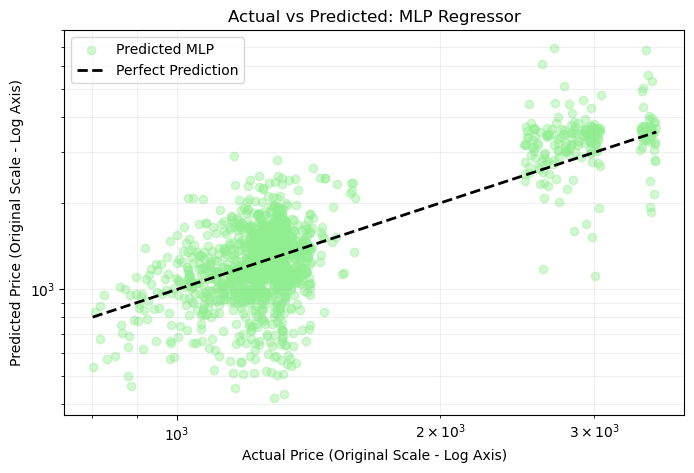


PREDICTION STATISTICS
Actual Price Range: $801.12 - $3,534.08
Predicted Price Range: $420.15 - $6,954.92
Mean Actual Price: $1,464.71
Mean Predicted Price: $1,533.81


In [51]:
# Your predictions and actual values
y_test_actual = targets_np.flatten()  # Actual values
y_test_pred_mlp = predictions_np.flatten()  # MLP predictions

# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_actual, y_test_pred_mlp, alpha=0.4, color='lightgreen', label='Predicted MLP')

# Perfect Prediction Line
line_min, line_max = y_test_actual.min(), y_test_actual.max()
plt.plot([line_min, line_max], [line_min, line_max], 'k--', lw=2, label='Perfect Prediction')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (Original Scale - Log Axis)')
plt.ylabel('Predicted Price (Original Scale - Log Axis)')
plt.title(f'Actual vs Predicted: MLP Regressor')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

# Print some statistics on the plot
print(f"\n{'='*50}")
print("PREDICTION STATISTICS")
print(f"{'='*50}")
print(f"Actual Price Range: ${y_test_actual.min():,.2f} - ${y_test_actual.max():,.2f}")
print(f"Predicted Price Range: ${y_test_pred_mlp.min():,.2f} - ${y_test_pred_mlp.max():,.2f}")
print(f"Mean Actual Price: ${y_test_actual.mean():,.2f}")
print(f"Mean Predicted Price: ${y_test_pred_mlp.mean():,.2f}")